In [26]:
import re

In [27]:

import os
master_array = [] #append results to array to create data frame
folder = './Friends/'

for filename in os.listdir(folder):
  if filename.endswith('.txt'):
    pattern = re.compile(r'(?<=\d)\s')
    name = filename.strip('.txt')#obtain the season and episodes
    split_name = re.split(pattern, name)
    seasonep = split_name[0]
    if '-' in seasonep:
      pattern = re.compile(r'-')
      split_seasons = re.split(pattern, seasonep)
      x = split_seasons[0]
      y = split_seasons[1]
      pattern = re.compile(r'E')
      x_split = re.split(pattern, x)
      y_split = re.split(pattern, y)
      season = x_split[0]
      episode = (int(x_split[1]) + int(y_split[1]))/2
      episode_name = split_name[1]
    else:
      pattern = re.compile(r'E')
      split_season = re.split(pattern, seasonep)   
      season = split_season[0]
      # print(season)
      episode = split_season[1]
      episode_name = split_name[1]

    with open(folder + filename, 'r', encoding='UTF-8') as f:
      lines = f.readlines() #read the script file
      pattern = re.compile(r'\w+:\s') # store the regex
      for line in lines:
        result = re.match(pattern, line)
        if result is not None: # split the script where our pattern matched (pink dot)
          split_line = line.split(':')
          character = split_line[0]
          speech = split_line[1].strip()
          line= [seasonep, season, episode, episode_name, character, speech]
          master_array.append(line)
        else:
          pass


In [28]:
import pandas as pd

friends = pd.DataFrame(master_array, columns=['id', 'season', 'episode', 'episode_name', 'character', 'line'])

In [29]:
friends.sample(20)

,id,season,episode,episode_name,character,line
27723,S05E20,S05,20,The Ride Along,Joey,"That's what this is about! Oh my God, you hate..."
10467,S02E22,S02,22,The Two Parties,ROSS,All right.
54559,S10E04,S10,04,The Cake,Monica,"(embraces Emma tightly) Ooh, I want one..."
47334,S09E01,S09,01,No One Proposes,Joey,"(entering) Oh uh, hey Pheebs. Uh y’know what? ..."
766,S01E03,S01,03,The Thumb,All,Mmm.
30435,S06E07,S06,07,Phoebe Runs,Phoebe,Why? Why would you do that?
33452,S06E19,S06,19,Joeys Fridge,Elizabeth,Doorknob?
56439,S10E11,S10,11,The Stripper Cries,Joey,"Paper, snow, a ghost!"
42936,S08E06,S08,06,The Halloween Party,Eric,(entering) Hey. Ursula said she left her purse.
37778,S07E11,S07,11,All The Cheesecakes,Monica,Limited seating my ass. Let’s see who made the...


In [30]:
# Ensure all names are refering to the correct person
print(sorted(friends['character'].unique()))
friends['character'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                    'JOEY':'Joey',
                    'MNCA':'Monica','MONICA':'Monica',
                    'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                    'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                    'ROSS':'Ross'},inplace=True)

['ALISON', 'ALL', 'AMBER', 'AMGER', 'Actor', 'Adrienne', 'Alan', 'Alex', 'Alice', 'All', 'Allesandro', 'Amanda', 'Amy', 'Anchorwoman', 'Andrea', 'Angela', 'Annabelle', 'Announcer', 'Arthur', 'Ashley', 'Assistant', 'Attendant', 'Aurora', 'BARRY', 'BEN', 'BILL', 'BOTH', 'BOYS', 'Ballerina', 'Bandleader', 'Barry', 'Ben', 'Benjamin', 'Bernice', 'Bill', 'Billy', 'Bitsy', 'Bob', 'Bobby', 'Bonnie', 'Boss', 'Both', 'Boy', 'Brenda', 'Burt', 'CAROL', 'CAROLINE', 'CHAN', 'CHANDLER', 'Cailin', 'Caitlin', 'Carl', 'Carol', 'Casey', 'Cashier', 'Cassie', 'Catherine', 'Cecilia', 'Celia', 'Chandler', 'Chandlers', 'Charlie', 'Cheryl', 'Chip', 'Chloe', 'Claudia', 'Clerk', 'Cliff', 'Clown', 'Colleen', 'Commercial', 'Conan', 'Cookie', 'Cop', 'Courtney', 'Cowgirl', 'Croupler', 'Customer', 'Customers', 'Cynthia', 'DIRECTOR', 'DOCTOR', 'DUNCAN', 'Dan', 'Dana', 'Danielle', 'Danny', 'Dave', 'David', 'Devon', 'Dina', 'Director', 'Dirk', 'Doctor', 'Don', 'Donny', 'Doug', 'Drew', 'EDDIE', 'ERICA', 'ERNIE', 'ESTELLE

In [31]:
friends['character'].value_counts()[:6]

Rachel      9285
Ross        9098
Chandler    8461
Monica      8386
Joey        8215
Phoebe      7473
Name: character, dtype: int64

In [32]:
def remove_stagedir(txt):
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in txt:
        if i == '[':
            skip1c += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret
    
friends['line'] = friends.line.apply(remove_stagedir)

friends.sample(20)


,id,season,episode,episode_name,character,line
46655,S08E22,S08,22,Rachel Is Late,Rachel,Yeah.
46973,S08E23,S08,23,Rachel Has A Baby,Chandler,"Yes, 98.6. You’re gonna be fine."
24228,S05E06,S05,06,The Yeti,Rachel,I want the little round waffles.
32572,S06E15-S06E16,S06,15.5,That Could Have Been Part I II,Ross,"Oh, I know. Y’know, just-just talking about i..."
16570,S03E23,S03,23,Rosss Thing,Phoebe,Vince is a fireman.
28248,S05E22,S05,22,Joeys Big Break,Phoebe,Bye!
663,S01E03,S01,03,The Thumb,Phoebe,I know.
41697,S08E02,S08,02,The Red Sweater,Rachel,"Yeah. Uh-huh, I guess it is pretty big news."
34563,S06E23,S06,23,The Ring,Chandler,"Yeah! Okay, go, go, go get him."
12962,S03E09,S03,09,The Football,Joey,Thank you.


In [34]:
friends2 = pd.read_csv(folder + 'friends_episodes_v3.csv')
friends2.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438


In [35]:
friends2.tail()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
231,2004,10,14,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
232,2004,10,15,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
233,2004,10,16,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
234,2004,10,17,The Last One: Part 1,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
235,2004,10,18,The Last One: Part 2,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


### ignore

In [48]:
# from nrclex import NRCLex

In [49]:
# import nltk
# # nltk.download('stopwords')
# from nltk.corpus import stopwords
# import string
# import re
# import spacy
# nlp = spacy.load("en_core_web_sm")

# def prep_for_nrclex(txt):
#     txt = txt.translate(str.maketrans(' ', ' ', string.punctuation))  
#     stops = set(stopwords.words("english"))
#     txt = [token.lemma_ for token in nlp(txt) if not token in stops and len(token) >= 3]
#     txt = " ".join(txt)
#     return txt

# friends['tokenized'] = friends['line'].apply(prep_for_nrclex)

c:\Users\Gebruiker\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [6]:
import pandas as pd
# friends.to_csv('friends.tsv', sep='\t')
friends = pd.read_csv('friends.tsv', sep='\t', index_col=0)
friends.head()

,id,season,episode,episode_name,character,line,tokenized
0,S01E01,S01,1.0,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I...,there nothing tell just some guy work with
1,S01E01,S01,1.0,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's...",Cmon you go out with the guy there get somethi...
2,S01E01,S01,1.0,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a h...",all right Joey nice do have hump hump and hair...
3,S01E01,S01,1.0,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?\n",wait do eat chalk
4,S01E01,S01,1.0,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through ...",just cause want she through what go through wi...


In [11]:
from sklearn.feature_extraction import DictVectorizer
dictvect = DictVectorizer(sparse=False)

from nrclex import NRCLex
lines = [str(value) for value in friends.tokenized.values]
d = [NRCLex(line).raw_emotion_scores for line in lines]
lex_matrix = dictvect.fit_transform(d)
lex_matrix.shape
lex_frame = pd.DataFrame(lex_matrix, columns = dictvect.get_feature_names())
lex_frame.head()
lex_frame.describe()

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
count,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000
mean,0.127398,0.285190,0.094273,0.160352,0.265035,0.313827,0.438375,0.157400,0.191617,0.251451
std,0.407875,0.632903,0.353236,0.457183,0.619065,0.677608,0.826893,0.452153,0.491875,0.592975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,15.000000,9.000000,14.000000,9.000000,11.000000,15.000000,16.000000,13.000000,8.000000,10.000000


In [12]:
friends = friends.join(lex_frame)

In [13]:
groups = friends.groupby('id')

lex = lex_frame.columns

bigdct = {}

for groupname in groups.groups:
    group = groups.get_group(groupname)
    print(group.head())
    dct = {}
    for sent in lex: 
        episode_sent = group[sent].sum()/len(group)
        dct[sent] = episode_sent
    bigdct[groupname] = dct



       id season  episode            episode_name character  \
0  S01E01    S01      1.0  Monica Gets A Roommate    Monica   
1  S01E01    S01      1.0  Monica Gets A Roommate      Joey   
2  S01E01    S01      1.0  Monica Gets A Roommate  Chandler   
3  S01E01    S01      1.0  Monica Gets A Roommate    Phoebe   
4  S01E01    S01      1.0  Monica Gets A Roommate    Phoebe   

                                                line  \
0   There's nothing to tell! He's just some guy I...   
1   C'mon, you're going out with the guy! There's...   
2   All right Joey, be nice.  So does he have a h...   
3                         Wait, does he eat chalk?\n   
4   Just, 'cause, I don't want her to go through ...   

                                           tokenized  anger  anticipation  \
0         there nothing tell just some guy work with    0.0           0.0   
1  Cmon you go out with the guy there get somethi...    0.0           0.0   
2  all right Joey nice do have hump hump and hair... 

In [14]:
imscared = pd.DataFrame(bigdct)
imscared.head()
test = imscared.transpose()
test.head()
# len(test)

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
S01E01,0.117845,0.306397,0.104377,0.185185,0.276094,0.316498,0.434343,0.178451,0.245791,0.272727
S01E02,0.139013,0.197309,0.103139,0.156951,0.165919,0.255605,0.309417,0.143498,0.107623,0.179372
S01E03,0.081712,0.210117,0.058366,0.132296,0.194553,0.256809,0.330739,0.143969,0.124514,0.221790
S01E04,0.102459,0.266393,0.094262,0.131148,0.295082,0.303279,0.405738,0.151639,0.192623,0.245902
S01E05,0.105042,0.277311,0.084034,0.184874,0.252101,0.285714,0.424370,0.138655,0.155462,0.340336


In [15]:
test.describe()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.128510,0.286536,0.095474,0.161706,0.265982,0.316917,0.440367,0.159490,0.191936,0.252895
std,0.042068,0.066210,0.035640,0.047394,0.072353,0.076841,0.091979,0.047825,0.051019,0.061089
min,0.047619,0.145522,0.024194,0.061475,0.130597,0.121951,0.272401,0.053942,0.076923,0.131206
25%,0.099411,0.237803,0.071349,0.131148,0.214286,0.262880,0.373950,0.124882,0.156920,0.207606
50%,0.124205,0.278409,0.090152,0.157890,0.253711,0.306860,0.432151,0.154549,0.186859,0.245939
75%,0.148741,0.328492,0.114717,0.185221,0.309276,0.361185,0.490434,0.188208,0.224248,0.290482
max,0.280992,0.451220,0.233607,0.329630,0.539171,0.585153,0.755760,0.314050,0.355450,0.463768


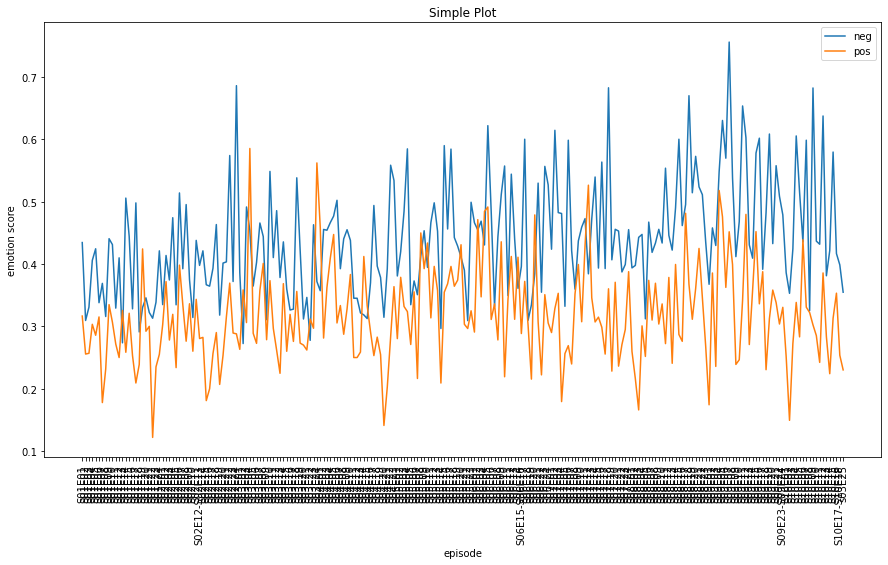

In [16]:
import matplotlib.pyplot as plt
# plt.plot(test["negative"])

plt.figure(figsize=(15, 8))
plt.plot(test['positive'], label='neg')
plt.plot(test['negative'], label='pos')
plt.xlabel('episode')
plt.ylabel('emotion score')
plt.xticks(rotation=90)
plt.title("Simple Plot")
plt.legend();


plt.show()

In [17]:
season_finale = friends.groupby('season').last()
sfinales = season_finale['id'].tolist()
print(sfinales)

['S01E24', 'S02E24', 'S03E24', 'S04E23', 'S05E23', 'S06E24', 'S07E24', 'S08E23', 'S09E23-S09E24', 'S10E17-S10E18', 's03E25']


In [21]:
sfins = test.loc[sfinales]
rest = test.drop(sfinales)

<AxesSubplot:>

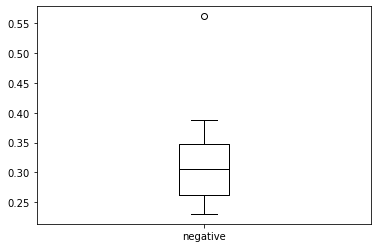

In [28]:
sfins.boxplot(column=['negative'], grid=False, color='black')


<AxesSubplot:>

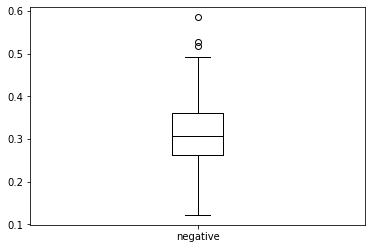

In [29]:

rest.boxplot(column=['negative'], grid=False, color='black')

<AxesSubplot:>

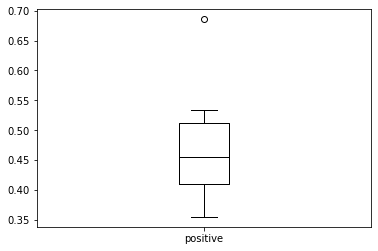

In [30]:
sfins.boxplot(column=['positive'], grid=False, color='black')

<AxesSubplot:>

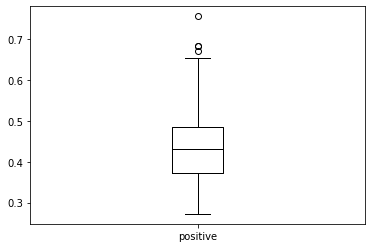

In [31]:
rest.boxplot(column=['positive'], grid=False, color='black')